In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank_data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data', index_col = 'ID')
bank_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002441D640748>,
      dtype=object)

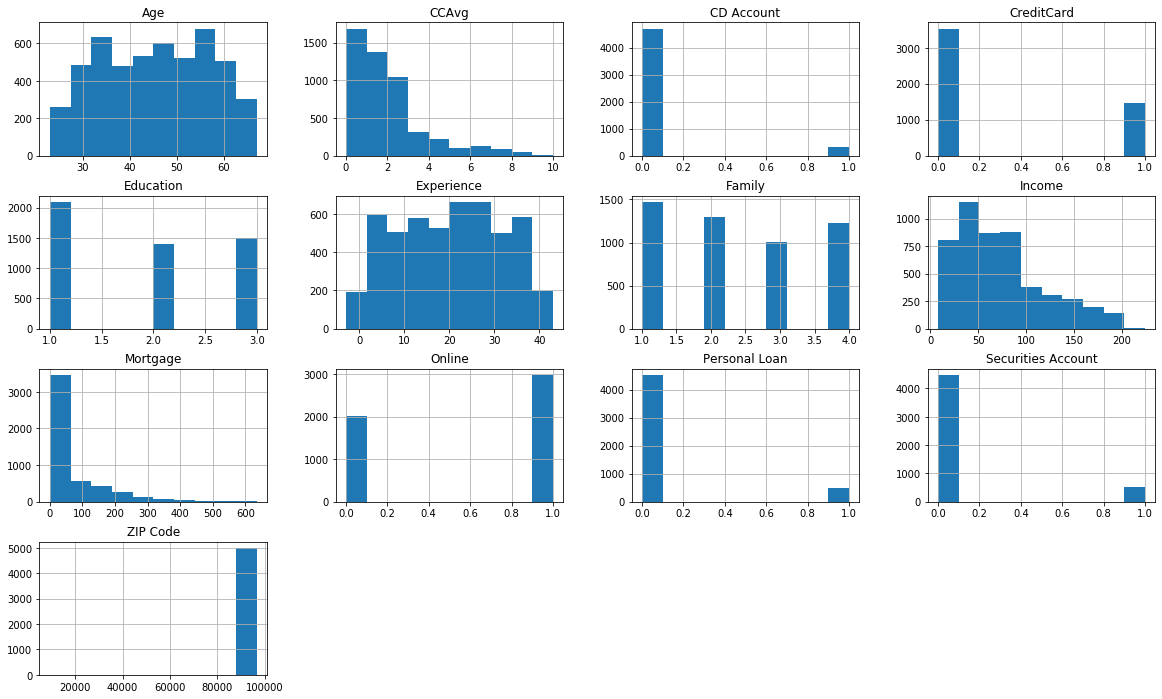

In [4]:
bank_data.hist(figsize = (20,12))

In [5]:
bank_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
cols = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [7]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [8]:
rf_model.fit(bank_data[cols], bank_data['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
print('OOB Score: ', rf_model.oob_score_)

OOB Score:  0.987


In [10]:
for cols,imp in zip(cols,rf_model.feature_importances_):
    print(cols,imp)

Age 0.04135793383326336
Experience 0.04120593694463561
Income 0.3360006329024848
ZIP Code 0.04494200293228742
Family 0.0867821728226014
CCAvg 0.17109944140440111
Education 0.15499154980801655
Mortgage 0.04360414238855675
Securities Account 0.005639501255662373
CD Account 0.05654096704870794
Online 0.00808010657818064
CreditCard 0.009755612081202117


In [11]:
features = ['Income', 'CCAvg', 'Education']

In [12]:
rf_model.fit(bank_data[features], bank_data['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
tree_model = tree.DecisionTreeClassifier(max_depth = 6)

In [14]:
tree_model.fit(bank_data[features], bank_data['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
tree_model.score(bank_data[features], bank_data['Personal Loan'])

0.9738

In [16]:
import graphviz 
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("bank_data") 

'bank_data.pdf'

[Text(180.07288732394366, 201.90857142857143, 'X[0] <= 113.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(81.34225352112676, 170.84571428571428, 'X[1] <= 2.95\ngini = 0.041\nsamples = 4021\nvalue = [3937, 84]'),
 Text(33.00845070422535, 139.78285714285715, 'X[0] <= 106.5\ngini = 0.007\nsamples = 3723\nvalue = [3710, 13]'),
 Text(28.292957746478873, 108.72, 'gini = 0.0\nsamples = 3629\nvalue = [3629, 0]'),
 Text(37.72394366197183, 108.72, 'X[2] <= 1.5\ngini = 0.238\nsamples = 94\nvalue = [81, 13]'),
 Text(18.861971830985915, 77.65714285714284, 'X[1] <= 0.35\ngini = 0.127\nsamples = 44\nvalue = [41, 3]'),
 Text(9.430985915492958, 46.59428571428572, 'X[1] <= 0.25\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(4.715492957746479, 15.531428571428563, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(14.146478873239436, 15.531428571428563, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(28.292957746478873, 46.59428571428572, 'X[0] <= 109.5\ngini = 0.057\nsamples = 34\n

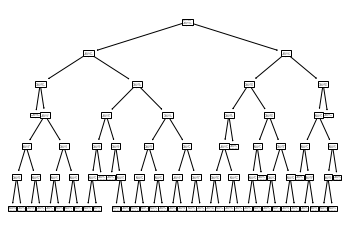

In [17]:
tree.plot_tree(tree_model)